<a href="https://colab.research.google.com/github/AvulaTrishal25/FMML_Project_-_Lab/blob/main/module3lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import math
from scipy.spatial import distance
import matplotlib.pyplot as plt

In [2]:
x_1 = np.array((1, 2))
x_2 = np.array((4, 6))

In [3]:
sumv = 0
for i in range(len(x_1)):
  sumv += ((x_1[i]-x_2[i])**2)
dist = math.sqrt(sumv)
print(dist)

5.0


In [4]:
euclidean_dist = np.sqrt(np.sum((x_1-x_2)**2))
print(euclidean_dist)

5.0


In [5]:
euclidean_dist = distance.euclidean(x_1, x_2)
print(euclidean_dist)

5.0


In [6]:
plotx = np.linspace(-10,10,50)
meshx, meshy = np.meshgrid(plotx,plotx)

In [7]:
tempeuclid = np.sqrt((meshx**2 + meshy**2))

In [8]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=tempeuclid, x=plotx, y=plotx)])
fig.update_layout(title='Euclidean Distance from origin', autosize=False,
                  width=1000, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [9]:
manhattan_dist = distance.cityblock(x_1, x_2)
print(manhattan_dist)

7


In [10]:
manhattan_dist = np.sum(np.abs((x_1 - x_2)))
print(manhattan_dist)

7


In [11]:
plotx = np.linspace(-10,10,50)
meshx, meshy = np.meshgrid(plotx,plotx)

In [12]:
tempmanhattan = np.abs(meshx) + np.abs(meshy)

In [13]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=tempmanhattan, x=plotx, y=plotx)])
fig.update_layout(title='Manhattan Distance from origin', autosize=False,
                  width=1000, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [14]:
def haversine(coord1, coord2):

    # Coordinates in decimal degrees (e.g. 2.89078, 12.79797)
    lon1, lat1 = coord1
    lon2, lat2 = coord2

    R = 6371000  # radius of Earth in meters
    phi_1 = math.radians(lat1)
    phi_2 = math.radians(lat2)

    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi_1) * math.cos(phi_2) * math.sin(delta_lambda / 2.0) ** 2

    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    meters = R * c  # output distance in meters
    km = meters / 1000.0  # output distance in kilometers

    meters = round(meters, 3)
    km = round(km, 3)


    print(f"Distance: " + str(km) + " km")

In [15]:
haversine([-0.116773, 51.510357], [-77.009003, 38.889931])

Distance: 5897.658 km


In [16]:
import random
import scipy.stats as ss
from sklearn.neighbors import KNeighborsClassifier

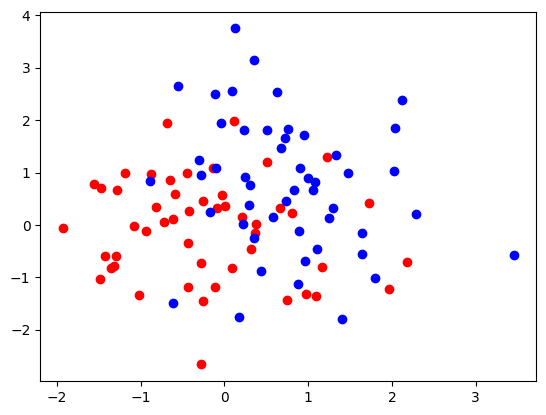

In [17]:
def generate_synth_data(n = 50):
    points = np.concatenate((ss.norm(0, 1).rvs((n, 2)), ss.norm(1, 1).rvs((n, 2))), axis = 0)
    outcomes = np.concatenate((np.repeat(0, n), np.repeat(1, n)))
    return (points, outcomes)

n = 50
pts,tgts = generate_synth_data(n) #generates 100 points
# print(tgts)
plt.figure()
plt.plot(pts[:n, 0], pts[:n, 1], "ro")
plt.plot(pts[n:, 0], pts[n:, 1], "bo")
plt.show()

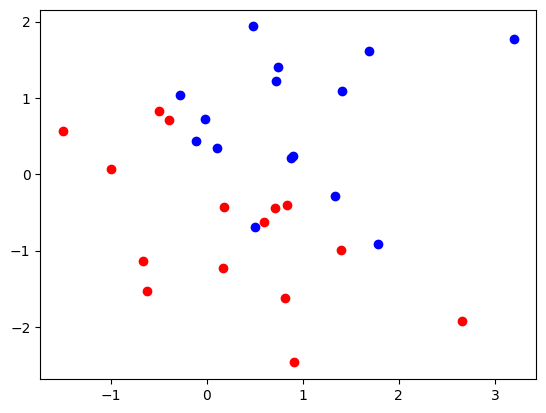

In [18]:
n = 15
test_pts,test_tgts = generate_synth_data(n)
# print(test_tgts)
plt.figure()
plt.plot(test_pts[:n, 0], test_pts[:n, 1], "ro")
plt.plot(test_pts[n:, 0], test_pts[n:, 1], "bo")
plt.show()

In [19]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(pts, tgts)
our_predictions = knn.predict(test_pts)
print("Prediction Accuracy: ")
print(100 * np.mean(our_predictions == test_tgts))

Prediction Accuracy: 
63.33333333333333


In [20]:
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
# data['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
data['target'] = pd.Series(iris.target)
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [21]:
np.random.seed(123)
indices = np.random.permutation(data.shape[0])
div = int(0.65 * len(indices))
train_idx, test_idx = indices[:div], indices[div:]

train_set, test_set = data.loc[train_idx,:], data.loc[test_idx,:]
test_class = list(test_set.iloc[:,-1])
train_class = list(train_set.iloc[:,-1])

In [22]:
def dist_euclidean(X1,X2):
    return distance.euclidean(X1,X2)

In [23]:
def dist_cosine(X1,X2):
    return distance.cosine(X1,X2)

In [24]:
def dist_manhattan(X1,X2):
    return distance.cityblock(X1,X2)

In [25]:
def dist_chebyshev(X1,X2):
    return distance.chebyshev(X1,X2)

In [26]:
metrics_list = [dist_euclidean,dist_cosine, dist_manhattan, dist_chebyshev]
for dist_metric in metrics_list:
  knn = KNeighborsClassifier(n_neighbors = 3, metric=dist_metric)
  knn.fit(train_set, train_class)
  our_predictions = knn.predict(test_set)
  print(dist_metric.__name__)
  print("Prediction Accuracy: ")
  print(100 * np.mean(our_predictions == test_class))
  print()

dist_euclidean
Prediction Accuracy: 
100.0

dist_cosine
Prediction Accuracy: 
100.0

dist_manhattan
Prediction Accuracy: 
100.0

dist_chebyshev
Prediction Accuracy: 
100.0

